# LINEAR REGRESSION (2 features)

In [1]:
# import standard packages

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### `1) Read data`

In [2]:
# link to data

<a href="https://archive.ics.uci.edu/ml/machine-learning-databases/housing" target="_blank">Click here</a>

In [3]:
# data features information

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 dollars
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in 1000's dollars

In [4]:
# read data from url

boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", #link
                     sep="\s+", #separator
                     names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", 
                            "AGE", "DIS", "RAD", "TAX", "PRATIO", "B", 
                            "LSTAT", "MEDV"]) # column names

### `2) Data Esploration`

In [5]:
# head of dataframe

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
# dataframe dimensions

boston.shape

(506, 14)

In [7]:
# dataframe infos

boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    float64
 10  PRATIO  506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MEDV    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
# dataframe numeric description

boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# cross correlation consideration

boston_corr = boston.corr()
boston_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


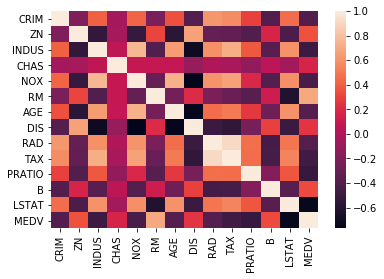

In [10]:
# correlation heatmap using seaborn

import seaborn as sns

sns.heatmap(boston_corr, xticklabels=boston.columns, yticklabels=boston.columns)

In [11]:
# select relevant features respect correlation values

cols = ["RM", "LSTAT", "PRATIO", "TAX", "INDUS", "MEDV"]

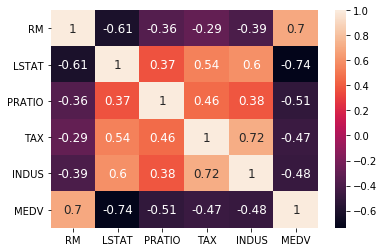

In [12]:
# correlation heatmap reduction

sns.heatmap(boston[cols].corr(), xticklabels=cols, yticklabels=cols, annot=True, annot_kws={"size": 12})

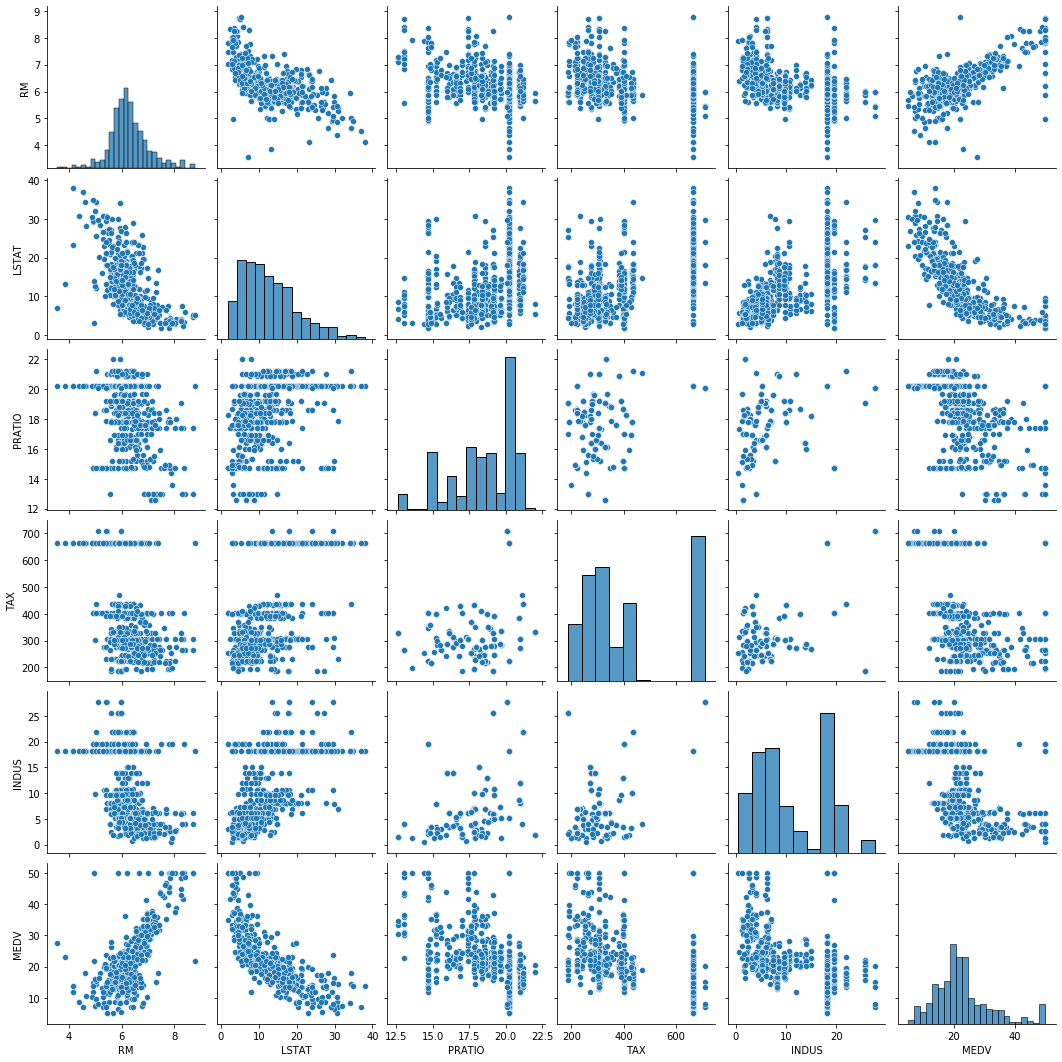

In [13]:
# pair plot features comparison

sns.pairplot(boston[cols])

In [14]:
# extract features column

X = boston[["RM", "LSTAT"]].values

In [15]:
# extract target column

Y = boston["MEDV"].values

### `3) Model creation`

In [16]:
# split dataset into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [17]:
# train linear regression model

from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# linear regression parameters

intercept = model.intercept_
slope = model.coef_

In [19]:
# make predictions

Y_pred = model.predict(X_test)
Y_pred

array([26.14882303, 24.12621325, 24.33157759, 12.98173578, 22.4070445 ,
       22.79207501, 21.25383779, 22.97242337, 15.57515215, 24.41689174,
       15.64247069, 18.94882581, 19.48387815,  3.84412167, 37.37432569,
       31.55122507, 23.48670899, 33.27211575, 28.56215976, 22.68390182,
       26.72911534, 20.74973824, 20.73012237, 27.03084994, 20.87371644,
        9.27869803, 20.04269056, 17.43468465, 37.31255882, 18.62005698,
       18.50717192, 20.09602428, 23.78101314, 21.64606443, 25.49541143,
       18.66849968, 11.8534158 , 22.74513805, 19.61706732, 14.48996773,
       24.26661064, 18.89334723, 24.02892647, 14.43925356, 26.39964013,
       25.45759587, 17.82974703, 20.07958355,  4.51952227, 26.89157581,
       20.26505726, 16.06730402, 21.52625801, 38.74455151, 16.71222993,
       18.43526207, 19.57541597, 20.43388955, 21.33341243, 17.80842473,
       23.49219528, 21.52918332, 31.16306856, 29.6014753 , 18.1168645 ,
       29.1091046 , 21.17826864, 17.96645414, 20.90139582, 21.55

### `4) Model evaluation`

In [20]:
# metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)
print("mean squared error: \n mse = %.2f" % (mse))
r2 = r2_score(Y_test, Y_pred)
print("r^2 score: \n r^2 = %.2f" % (r2))

mean squared error: 
 mse = 32.73
r^2 score: 
 r^2 = 0.61
